In [2]:
''' 
20170937, JESOON KANG
Date : 2019. 9. 26


    Assignment 1. 

- Logistic regression -


'''
import matplotlib.pyplot as plt
import math
import numpy as np
import random

'''
New.
'''
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os










In [4]:



transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = './data/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = './data/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  







In [10]:
print(trainset[1])

(tensor([[[0.6000, 0.5961, 0.6000,  ..., 0.8353, 0.8745, 0.9059],
         [0.6078, 0.6039, 0.6039,  ..., 0.8353, 0.8392, 0.8627],
         [0.6118, 0.6118, 0.6118,  ..., 0.8235, 0.8157, 0.8235],
         ...,
         [0.7451, 0.7725, 0.7765,  ..., 0.8510, 0.8314, 0.7922],
         [0.7608, 0.7686, 0.7647,  ..., 0.7922, 0.7843, 0.7647],
         [0.7529, 0.7804, 0.7765,  ..., 0.8078, 0.7922, 0.7529]]]), 0)


In [11]:
print(trainset)

Dataset ImageFolder
    Number of datapoints: 1027
    Root location: ./data/horse-or-human/train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               ToTensor()
           )


In [48]:
# sigmoid Function.
def sigmoid(z) :
    return 1 / (1 + math.e ** (-z))

In [49]:
# h(x) Function. hypothesis Func.
def hypothesis(weight,X) :
    theta = np.array(weight)
    z = np.dot(X,theta)
    h = sigmoid(z)
    return h

In [50]:
# Loss Function
def lossFunction(h,y) :
    # if i = 1, it occurs ZeroDivisionError ,
    # So, adjust value to 0.995
    for i in h :
        if i == 1 :
            i = 0.995
    try : 
        ret = (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
    except ZeroDivisionError :
        print("Error")
    finally :
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

In [77]:
# predict Function. if h(x) returns >=0.5, set to 1. other cases, set to 0.
def predict(h, labels) :
    mount = len(h)
    correct = 0
    
    for i in range(0,mount) :
        if h[i] >= 0.5 :
            if labels[i] == 1 :
                correct +=1
        else :
            if labels[i] == 0 :
                correct +=1
    
    
    
    
    return correct * (1/mount)


In [96]:
# Data reconstruct. vectorize

training_vectorized = []
training_labels = []

validation_vectorized = []
validation_labels = []


for i, data in enumerate(trainloader) :
    train_data = []
    inputs, labels = data

    for u in inputs :
        for col in u[0] :
            train_data += list(col)
    training_vectorized.append(train_data)
    training_labels.append([labels])

training_vectorized = np.array(train_set_vectorized)
training_labels = np.array(train_set_labels)

for i, data in enumerate(valloader) :
    val_data = []
    inputs, labels = data
    for u in inputs :
        for col in u[0] :
            val_data += list(col)
    validation_vectorized.append(val_data)
    validation_labels.append([labels])
validation_vectorized = np.array(validation_vectorized)
validation_labels = np.array(validation_labels)


In [97]:
# Initial Weight Value
weight = np.zeros((10000,1),dtype=float)

print(weight)

# Learning rate 
learning_rate = 0.00001

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [58]:
h = hypothesis(weight,train_set_vectorized)
gradient = np.dot(train_set_vectorized.T,h-train_set_labels) / len(train_set_vectorized)

In [99]:

# Log variables setting
log_training_loss = []
log_validation_loss = []
log_iter = []
log_training_acc = []
log_validation_acc = []


i = 0

loss_log_train.append(1)
# train, 5000 times
while (True):
    i += 1
    h = hypothesis(weight,training_vectorized)
    
    gradient = np.dot(training_vectorized.T,h-training_labels) / len(training_vectorized)
    
    # adjust weight values with gradient value
    weight-= learning_rate*gradient    
    
    # get train loss value
    training_loss = lossFunction(h,training_labels)
    
    # get accuracy
    training_acc = predict(h,train_set_labels)
    
    
    h_validation = hypothesis(weight, validation_vectorized)
    validation_loss = lossFunction(h_validation, validation_labels)
    validation_acc = predict(h_validation, validation_labels)
    
    # add log data
    log_training_loss.append(training_loss)
    log_training_acc.append(training_acc)
    
    log_validation_loss.append(validation_loss)
    log_validation_acc.append(validation_acc)
    log_iter.append(i)
    
    print("iter : ",i, "  t_loss : ",training_loss,"  t_acc : ", training_acc,"  v_loss: ",validation_loss, "  v_acc: ", validation_acc)
    print(loss_log_train[-1])
    
    
    
    if ( (abs(cur_train_loss - loss_log_train[-2]) < 0.0000001) ) :
        print("loss val is convergenced")
        break
    
    
print("Finished")    


iter :  1   t_loss :  0.6930653581694007   t_acc :  0.513145082765336   v_loss:  0.6930340369186367   v_acc:  0.5
1
iter :  2   t_loss :  0.6929844815116197   t_acc :  0.513145082765336   v_loss:  0.6929793976832923   v_acc:  0.5
1
iter :  3   t_loss :  0.6929045363278128   t_acc :  0.513145082765336   v_loss:  0.6929260105052961   v_acc:  0.5
1
iter :  4   t_loss :  0.6928255085736981   t_acc :  0.513145082765336   v_loss:  0.6928738487232173   v_acc:  0.5
1
iter :  5   t_loss :  0.6927473844163334   t_acc :  0.513145082765336   v_loss:  0.6928228861373302   v_acc:  0.5
1
iter :  6   t_loss :  0.6926701502309922   t_acc :  0.513145082765336   v_loss:  0.6927730970023488   v_acc:  0.5
1
iter :  7   t_loss :  0.6925937925980834   t_acc :  0.513145082765336   v_loss:  0.692724456020266   v_acc:  0.5
1
iter :  8   t_loss :  0.6925182983001142   t_acc :  0.513145082765336   v_loss:  0.6926769383332954   v_acc:  0.5
1
iter :  9   t_loss :  0.6924436543186975   t_acc :  0.513145082765336   v

iter :  73   t_loss :  0.6889653212008163   t_acc :  0.513145082765336   v_loss:  0.691098067626195   v_acc:  0.5
1
iter :  74   t_loss :  0.6889255406735195   t_acc :  0.513145082765336   v_loss:  0.691086767030851   v_acc:  0.5
1
iter :  75   t_loss :  0.688886072634716   t_acc :  0.513145082765336   v_loss:  0.6910756367974378   v_acc:  0.5
1
iter :  76   t_loss :  0.688846912398255   t_acc :  0.513145082765336   v_loss:  0.6910646699935972   v_acc:  0.5
1
iter :  77   t_loss :  0.6888080553490442   t_acc :  0.513145082765336   v_loss:  0.6910538598269026   v_acc:  0.5
1
iter :  78   t_loss :  0.6887694969419718   t_acc :  0.513145082765336   v_loss:  0.6910431996424593   v_acc:  0.5
1
iter :  79   t_loss :  0.6887312327008452   t_acc :  0.513145082765336   v_loss:  0.6910326829205453   v_acc:  0.5
1
iter :  80   t_loss :  0.6886932582173461   t_acc :  0.513145082765336   v_loss:  0.6910223032742882   v_acc:  0.5
1
iter :  81   t_loss :  0.6886555691500007   t_acc :  0.5131450827653

KeyboardInterrupt: 

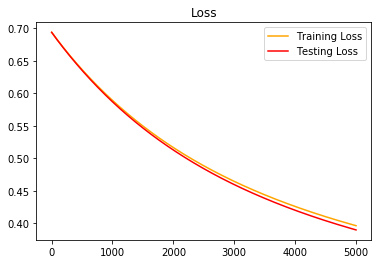

In [16]:
t1 = plt.plot(iter_log,loss_log_train, color='orange',label='Training Loss')
t2 = plt.plot(iter_log,loss_log_test, color= 'red',label='Testing Loss')
plt.title("Loss")
plt.legend(['Training Loss','Testing Loss'])
plt.show()

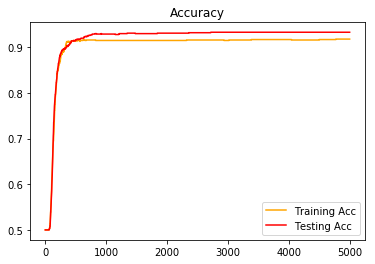

In [17]:
t1 = plt.plot(iter_log,acc_log_train, color='orange',label='Training Acc')
t2 = plt.plot(iter_log,acc_log_test, color= 'red',label='Testing Acc')
plt.title("Accuracy")
plt.legend(['Training Acc','Testing Acc'])
plt.show()

In [18]:
# commit Point.